# Laboratorio 2 - Práctica 1: Perceptrón para funciones lógicas
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---

## **Índice**
1. [Introducción](#id0)
1. [Función previas](#id1)
1. [Apartado 1](#id2)
1. [Apartado 2](#id3)

---

### Importar Librerías

---

In [16]:
#Importacion de Librerias
import numpy as np
import pandas as pd
import sklearn
import tensorflow as ts
import keras
import matplotlib.pyplot as plt
import pprint
import os
import imageio
import csv

<div id='id0'/>

## *Introducción*
---
Resolver funciones lógicas usando un modelo neuronal simple. Deberás codificar un modelo neuronal desde cero  según  lo visto  en  teoría  y  las  instrucciones  del  apartado  “Implementación”. Responde  a  las  preguntas  que  se  plantean  en  “Cuestiones”.  Debes  de  usar  comentarios  con  profusión,  incluyendo  celdas  específicas  donde expliques los algoritmos que usas y el código que has programado.

---


<div id='id1'/>

## Funciones previas al apartado 1

---
Programa un PERCEPTRÓN cuyos pesos iniciales tendrán un valor al azar entre -1.0 y 1.0 ambos incluidos y que se entrenará usando la Ley de Hebb.

### Funcion para pintar el learning rate

In [17]:
def plot_variacion_error(error):
    """
    Esta función grafica la variación del learning rate en cada iteración.
    :param lrate: una lista de valores de learning rate en cada iteración
    """
    # Crear la figura
    fig, ax = plt.subplots()

    # Crear el gráfico de línea
    ax.plot(error, label='Error')

    # Añadir etiquetas y título
    ax.set_xlabel('Iteración')
    ax.set_ylabel('Valor del Error')
    ax.set_title('Variación del Error')

    # Mostrar la leyenda y el gráfico
    ax.legend()
    plt.show()

## Funcion Imprimir las regiones

In [18]:
def imprimir_regiones(entradas, salidas, matriz_pesos, teta, ruta):
     # Crear una figura
    fig, ax = plt.subplots()

    # Configurar los límites de los ejes
    ax.set_xlim((-0.1, 1.1))
    ax.set_ylim((-0.1, 1.1))

    # Graficar los puntos de las dos clases
    puntos_clase_0 = entradas[salidas == 0]
    puntos_clase_1 = entradas[salidas == 1]
    ax.scatter(puntos_clase_0[:, 0], puntos_clase_0[:, 1], color='blue', label='Clase 0')
    ax.scatter(puntos_clase_1[:, 0], puntos_clase_1[:, 1], color='red', label='Clase 1')

    # Graficar la frontera de decisión
    x_linea = np.linspace(0, 1, 10)
    pendiente = -matriz_pesos[0] / matriz_pesos[1]
    print(pendiente)
    intercepcion = teta / matriz_pesos[1]
    print(intercepcion)
    y_linea = pendiente * x_linea + intercepcion
    print(y_linea)
    ax.plot(x_linea, y_linea, 'r-', label='Frontera de decisión')
    plt.savefig(ruta)
    # Configurar la leyenda
    ax.legend()

    # Mostrar la figura
    plt.show()

### Video animación aprendizaje Perceptrón

In [19]:
def animacion(cont, carpeta):
    with imageio.get_writer(carpeta + '/animacion.mp4', fps=30) as writer:
        for i in range(cont - 1):
            filename = carpeta + "/imagen" + str(i) + ".png"
            image = imageio.imread(filename)
            writer.append_data(image)

In [20]:
if(os.path.exists("Evolucion_AND")) == 0:
    os.mkdir("Evolucion_AND")

### Función para escribir en el CSV

In [2]:
# Función para escribir los resultados del Perceptrón en un archivo CSV
def escribir_csv(nombre_archivo, resultados):
    with open(nombre_archivo, mode='w', newline='') as archivo:
        writer = csv.writer(archivo)
        writer.writerow(['epoca', 'lr', 'theta', 'w1', 'w2', 'entrada 1', 'entrada 2', 'salida deseada', 'salida obtenida', 'error'])
        for fila in resultados:
            writer.writerow(fila)


### Función de Transferencia

In [22]:
def limite(S, teta):
    if (S >= teta):
        return 1
    elif(S < teta):
        return 0

<div id='id2'/>

## *Apartado 1*: Resuelve la función AND. Prueba diferentes learning rates y umbrales para saber cuál es el óptimo. Sacar por pantalla las salidas de la red neuronal y el valor del error para cada iteración.
---

### Iniciación del Perceprtón

In [23]:
#Iniciación del Perceptrón
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

salidas_esperadas = np.array([0, 0, 0, 1])

salidas = []
#Vector aleatorio de datos entre 0 y 1
matriz_pesos = np.round(np.random.uniform(low = -1, high = 1, size= (2,)), 2)

teta = float(input("Introduzca el Teta: "))

lr = float(input("Introduzca el Learning Rate: "))

epocas = int(input("Introduzca el numero de repeticiones: "))

cont = 0

ruta = "Evolucion_AND/imagen" + str(cont) + ".png"

### Entrenamiento

---------------
Iteración  0
matriz_pesos [ 0.26 -0.94]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  0
matriz_pesos [ 0.26 -0.94]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.94
---------------
0.17021276595744683
-0.10638297872340427
[-0.10638298 -0.08747045 -0.06855792 -0.04964539 -0.03073286 -0.01182033
  0.0070922   0.02600473  0.04491726  0.06382979]


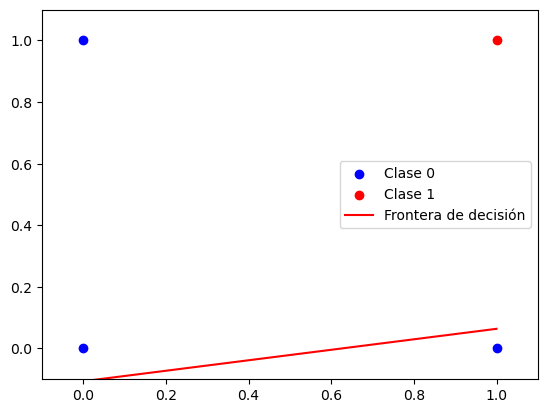

---------------
Iteración  0
matriz_pesos [ 0.16 -0.94]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
0.30952380952380953
-0.11904761904761905
[-0.11904762 -0.08465608 -0.05026455 -0.01587302  0.01851852  0.05291005
  0.08730159  0.12169312  0.15608466  0.19047619]


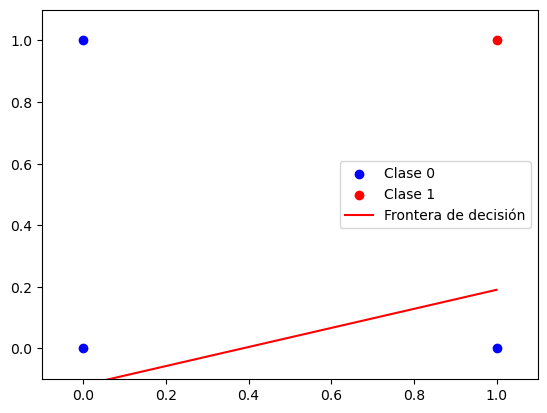

---------------
Iteración  0
matriz_pesos [ 0.26 -0.84]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.7799999999999999
---------------
---------------
Iteración  0
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.84]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.7799999999999999
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  1
matriz_pesos [ 0.26 -0.84]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  1
matriz_pesos [ 0.26 -0.84]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.84
---------------
0.1904761904761905
-0.11904761904761905
[-0.11904762 -0.0978836  -0.07671958 -0.05555556 -0.03439153 -0.01322751
  0.00793651  0.02910053  0.05026455  0.07142857]


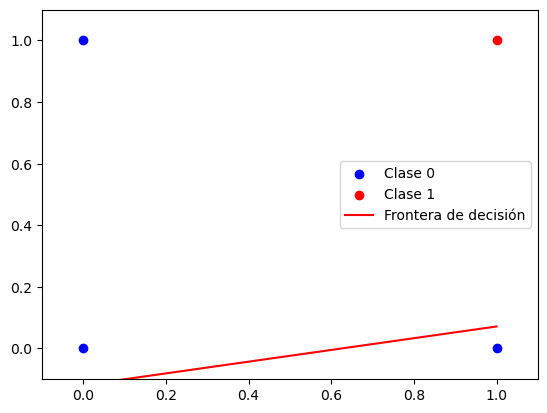

---------------
Iteración  1
matriz_pesos [ 0.16 -0.84]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
0.35135135135135137
-0.13513513513513514
[-0.13513514 -0.0960961  -0.05705706 -0.01801802  0.02102102  0.06006006
  0.0990991   0.13813814  0.17717718  0.21621622]


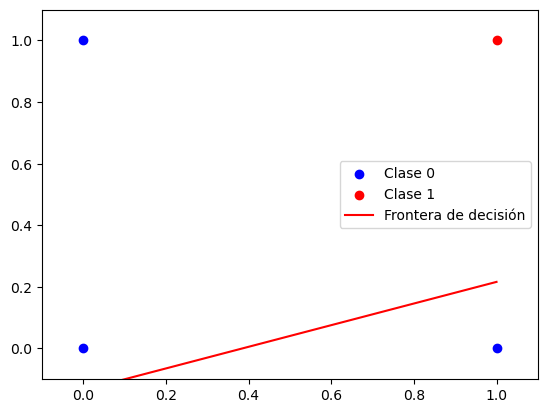

---------------
Iteración  1
matriz_pesos [ 0.26 -0.74]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.6799999999999999
---------------
---------------
Iteración  1
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.74]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.6799999999999999
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  2
matriz_pesos [ 0.26 -0.74]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  2
matriz_pesos [ 0.26 -0.74]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.74
---------------
0.21621621621621623
-0.13513513513513514
[-0.13513514 -0.11111111 -0.08708709 -0.06306306 -0.03903904 -0.01501502
  0.00900901  0.03303303  0.05705706  0.08108108]


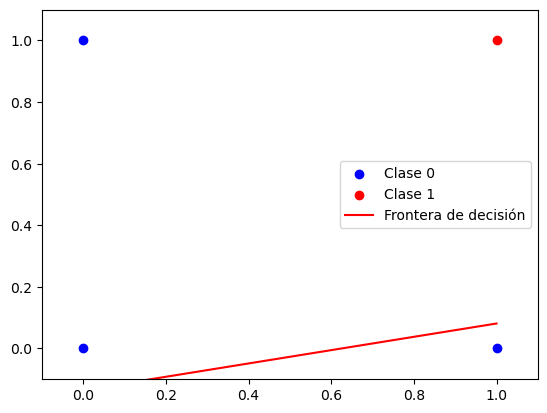

---------------
Iteración  2
matriz_pesos [ 0.16 -0.74]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
0.40625
-0.15625
[-0.15625    -0.11111111 -0.06597222 -0.02083333  0.02430556  0.06944444
  0.11458333  0.15972222  0.20486111  0.25      ]


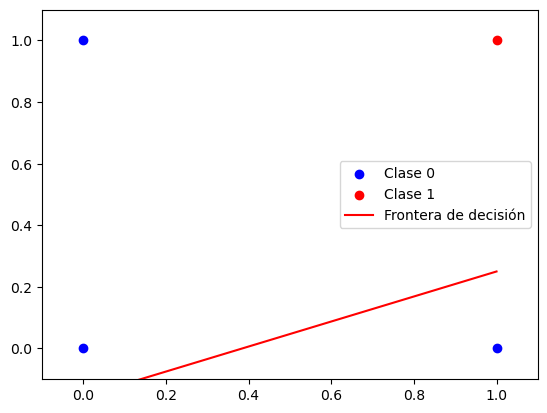

---------------
Iteración  2
matriz_pesos [ 0.26 -0.64]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.58
---------------
---------------
Iteración  2
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.64]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.58
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  3
matriz_pesos [ 0.26 -0.64]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  3
matriz_pesos [ 0.26 -0.64]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.64
---------------
0.25
-0.15625
[-0.15625    -0.12847222 -0.10069444 -0.07291667 -0.04513889 -0.01736111
  0.01041667  0.03819444  0.06597222  0.09375   ]


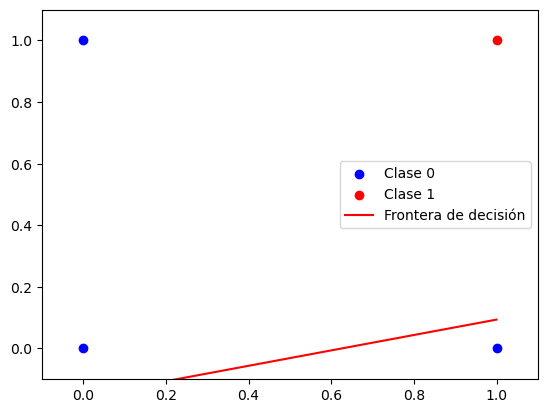

---------------
Iteración  3
matriz_pesos [ 0.16 -0.64]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
0.48148148148148145
-0.18518518518518517
[-0.18518519 -0.13168724 -0.0781893  -0.02469136  0.02880658  0.08230453
  0.13580247  0.18930041  0.24279835  0.2962963 ]


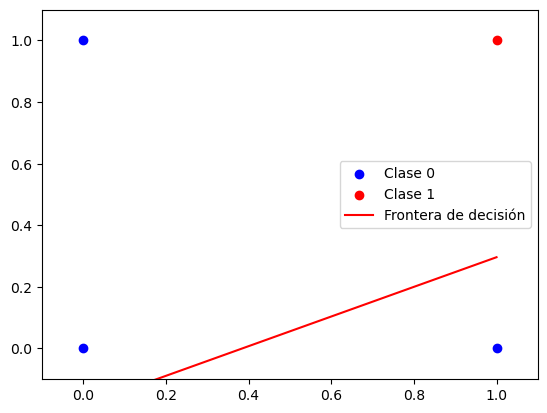

---------------
Iteración  3
matriz_pesos [ 0.26 -0.54]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.48
---------------
---------------
Iteración  3
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.54]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.48
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  4
matriz_pesos [ 0.26 -0.54]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  4
matriz_pesos [ 0.26 -0.54]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.54
---------------
0.2962962962962963
-0.18518518518518517
[-0.18518519 -0.15226337 -0.11934156 -0.08641975 -0.05349794 -0.02057613
  0.01234568  0.04526749  0.0781893   0.11111111]


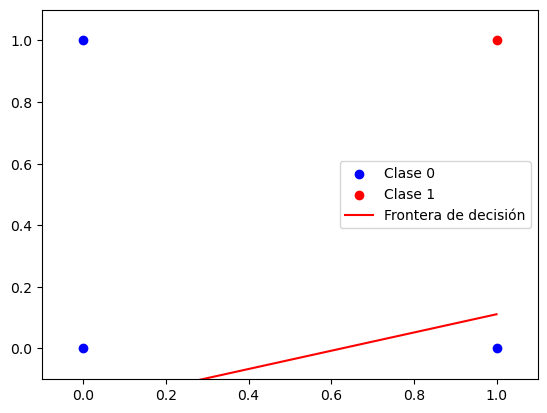

---------------
Iteración  4
matriz_pesos [ 0.16 -0.54]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
0.5909090909090908
-0.22727272727272727
[-0.22727273 -0.16161616 -0.0959596  -0.03030303  0.03535354  0.1010101
  0.16666667  0.23232323  0.2979798   0.36363636]


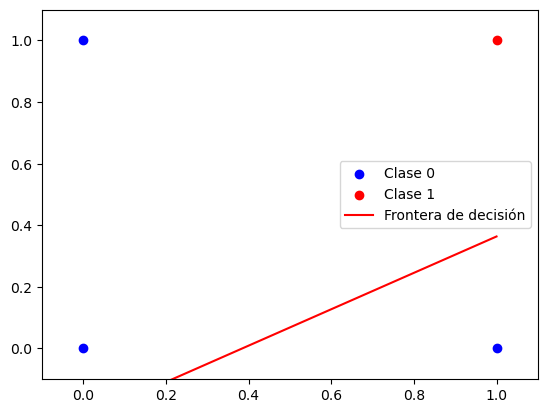

---------------
Iteración  4
matriz_pesos [ 0.26 -0.44]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.38
---------------
---------------
Iteración  4
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.44]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.38
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  5
matriz_pesos [ 0.26 -0.44]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  5
matriz_pesos [ 0.26 -0.44]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.44000000000000006
---------------
0.3636363636363636
-0.22727272727272727
[-0.22727273 -0.18686869 -0.14646465 -0.10606061 -0.06565657 -0.02525253
  0.01515152  0.05555556  0.0959596   0.13636364]


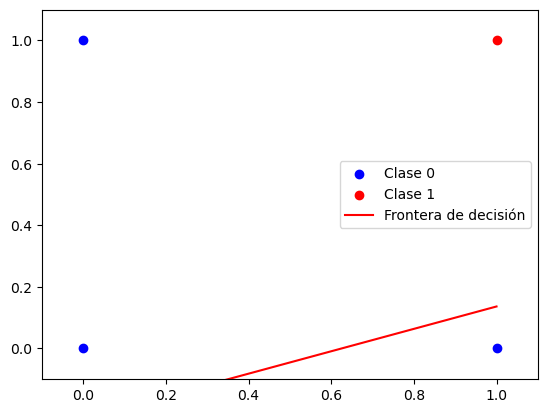

---------------
Iteración  5
matriz_pesos [ 0.16 -0.44]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
0.764705882352941
-0.2941176470588235
[-0.29411765 -0.20915033 -0.12418301 -0.03921569  0.04575163  0.13071895
  0.21568627  0.30065359  0.38562092  0.47058824]


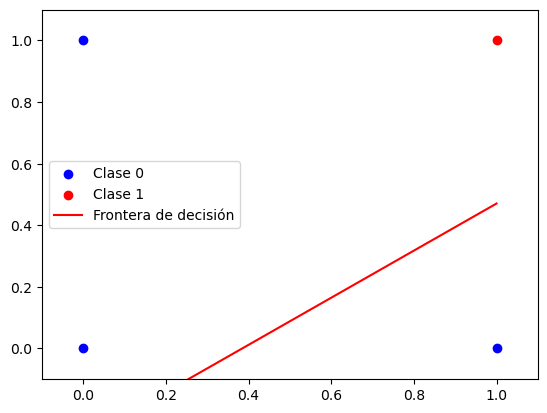

---------------
Iteración  5
matriz_pesos [ 0.26 -0.34]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.28
---------------
---------------
Iteración  5
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.34]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.28
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  6
matriz_pesos [ 0.26 -0.34]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  6
matriz_pesos [ 0.26 -0.34]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.3400000000000001
---------------
0.47058823529411753
-0.2941176470588235
[-0.29411765 -0.24183007 -0.18954248 -0.1372549  -0.08496732 -0.03267974
  0.01960784  0.07189542  0.12418301  0.17647059]


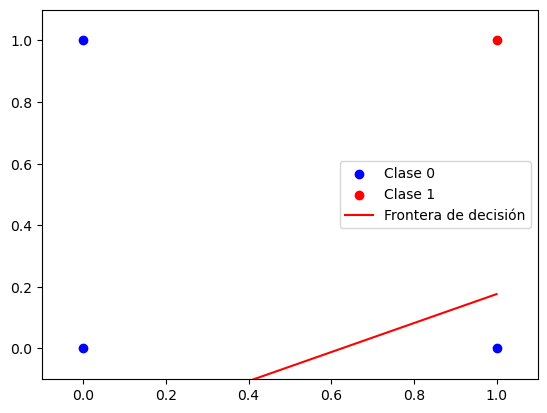

---------------
Iteración  6
matriz_pesos [ 0.16 -0.34]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
1.083333333333333
-0.4166666666666666
[-0.41666667 -0.2962963  -0.17592593 -0.05555556  0.06481481  0.18518519
  0.30555556  0.42592593  0.5462963   0.66666667]


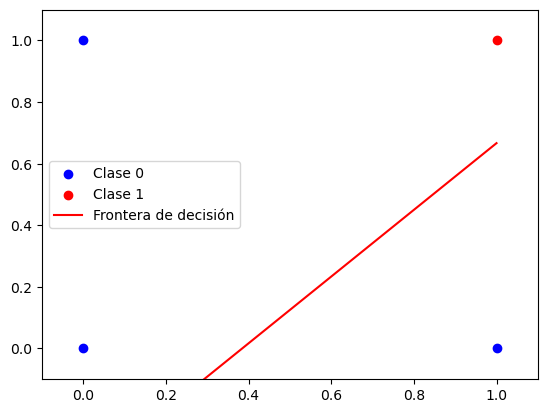

---------------
Iteración  6
matriz_pesos [ 0.26 -0.24]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.18000000000000008
---------------
---------------
Iteración  6
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.24]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.18000000000000008
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  7
matriz_pesos [ 0.26 -0.24]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  7
matriz_pesos [ 0.26 -0.24]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.24000000000000007
---------------
0.6666666666666665
-0.4166666666666666
[-0.41666667 -0.34259259 -0.26851852 -0.19444444 -0.12037037 -0.0462963
  0.02777778  0.10185185  0.17592593  0.25      ]


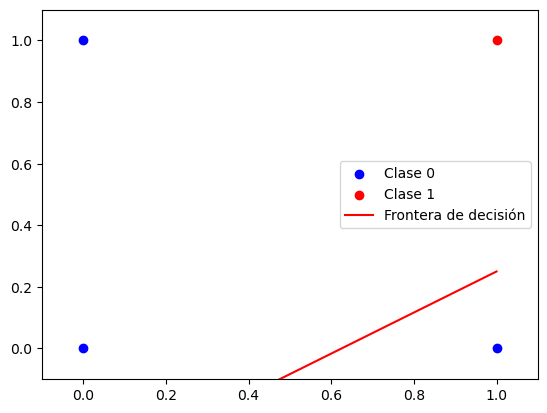

---------------
Iteración  7
matriz_pesos [ 0.16 -0.24]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
1.8571428571428563
-0.714285714285714
[-0.71428571 -0.50793651 -0.3015873  -0.0952381   0.11111111  0.31746032
  0.52380952  0.73015873  0.93650794  1.14285714]


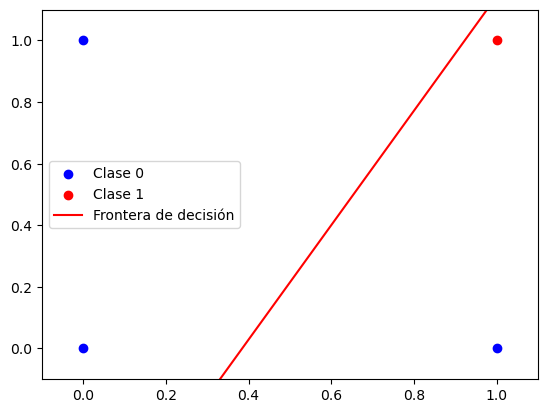

---------------
Iteración  7
matriz_pesos [ 0.26 -0.14]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas -0.08000000000000007
---------------
---------------
Iteración  7
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.14]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas -0.08000000000000007
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  8
matriz_pesos [ 0.26 -0.14]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  8
matriz_pesos [ 0.26 -0.14]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.14000000000000007
---------------
1.1428571428571423
-0.714285714285714
[-0.71428571 -0.58730159 -0.46031746 -0.33333333 -0.20634921 -0.07936508
  0.04761905  0.17460317  0.3015873   0.42857143]


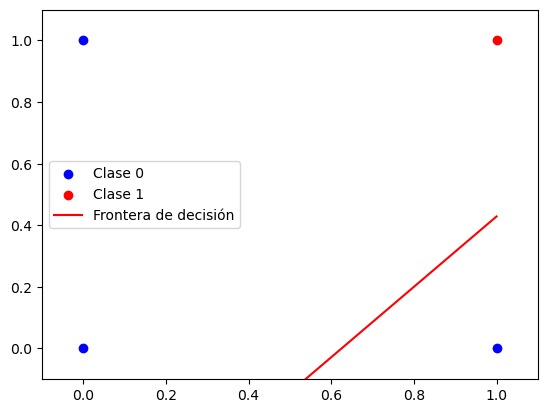

---------------
Iteración  8
matriz_pesos [ 0.16 -0.14]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
6.49999999999999
-2.499999999999996
[-2.5        -1.77777778 -1.05555556 -0.33333333  0.38888889  1.11111111
  1.83333333  2.55555556  3.27777778  4.        ]


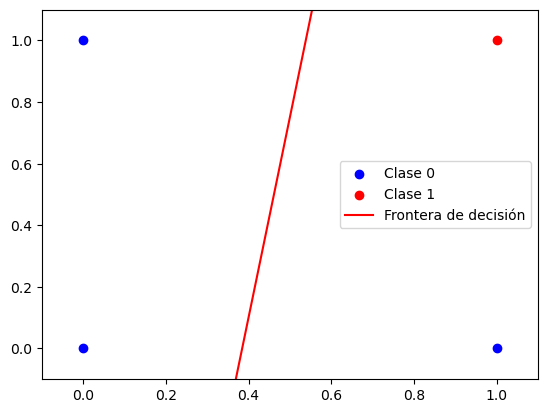

---------------
Iteración  8
matriz_pesos [ 0.26 -0.04]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas 0.019999999999999934
---------------
---------------
Iteración  8
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.26 -0.04]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.019999999999999934
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  9
matriz_pesos [ 0.26 -0.04]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  9
matriz_pesos [ 0.26 -0.04]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.04000000000000006
---------------
3.999999999999994
-2.499999999999996
[-2.5        -2.05555556 -1.61111111 -1.16666667 -0.72222222 -0.27777778
  0.16666667  0.61111111  1.05555556  1.5       ]


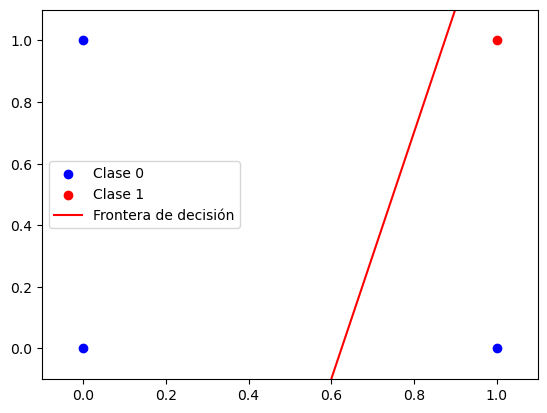

---------------
Iteración  9
matriz_pesos [ 0.16 -0.04]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.26
---------------
---------------
Iteración  9
matriz_pesos [ 0.16 -0.04]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 1
Error 0
Entradas 0.11999999999999994
---------------
---------------
Iteración  9
Error Total:  [ 0  0 -1  0]
matriz_pesos [ 0.16 -0.04]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 1]
Error 0
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  0]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  10
matriz_pesos [ 0.16 -0.04]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  10
matriz_pesos [ 0.16 -0.04]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas -0.04000000000000006
---------------
1.4999999999999976
-2.499999999999996
[-2.5        -2.33333333 -2.16666667 -2.         -1.83

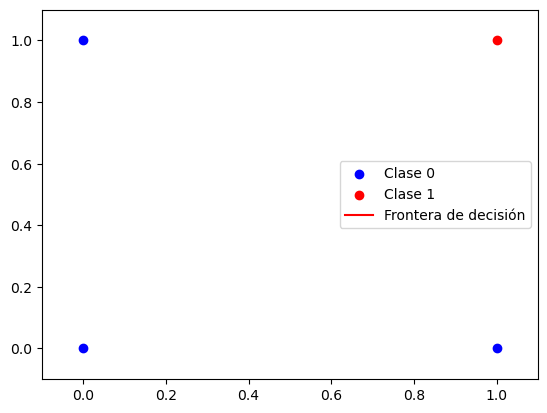

---------------
Iteración  10
matriz_pesos [ 0.06 -0.04]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.16
---------------
-2.666666666666669
1.6666666666666683
[ 1.66666667  1.37037037  1.07407407  0.77777778  0.48148148  0.18518519
 -0.11111111 -0.40740741 -0.7037037  -1.        ]


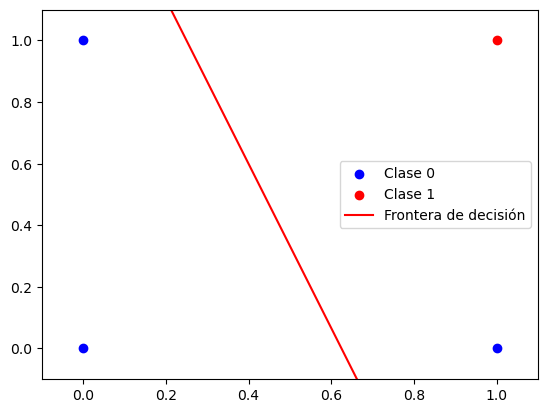

---------------
Iteración  10
matriz_pesos [0.16 0.06]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 1
Entradas 0.019999999999999934
---------------
---------------
Iteración  10
Error Total:  [ 0  0 -1  1]
matriz_pesos [0.16 0.06]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.019999999999999934
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  11
matriz_pesos [0.16 0.06]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  11
matriz_pesos [0.16 0.06]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.05999999999999994
---------------
-1.0000000000000009
1.6666666666666683
[1.66666667 1.55555556 1.44444444 1.33333333 1.22222222 1.11111111
 1.         0.88888889 0.77777778 0.66666667]


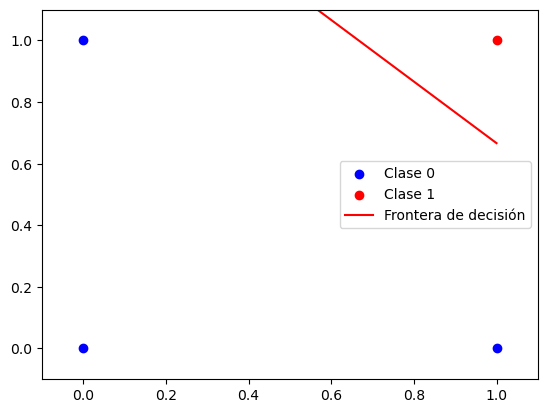

---------------
Iteración  11
matriz_pesos [0.06 0.06]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salida_real 1
Error -1
Entradas 0.16
---------------
---------------
Iteración  11
matriz_pesos [0.06 0.06]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salida_real 1
Error 0
Entradas 0.11999999999999994
---------------
---------------
Iteración  11
Error Total:  [ 0  0 -1  0]
matriz_pesos [0.06 0.06]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 1]
Error 0
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  0]
Learning Rate:  0.1
Theta:  0.1
---------------
---------------
Iteración  12
matriz_pesos [0.06 0.06]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.0
---------------
---------------
Iteración  12
matriz_pesos [0.06 0.06]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salida_real 0
Error 0
Entradas 0.05999999999999994
---------------
---------------
Iteración  12
matriz_pesos [0.06 0.06]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]


In [24]:
errorHistorico = []
periodo = 0
resultados = []
for periodo in range(epocas):
    salidas = []
    for i in range(4):
        S = matriz_pesos[0] * entradas[i][0] + matriz_pesos[1] * entradas[i][1]
        salida_real = limite(S, teta)
        salidas.append(salida_real)
        error = salidas_esperadas[i] - salidas[i]
        resultados.append([
            periodo,  # Número de época
            lr,  # Learning rate
            teta,  # Valor de umbral (theta)
            matriz_pesos[0],  # Pesos de las entradas (w1)
            matriz_pesos[1],  # Pesos de las entradas (w2)
            entradas[i][0],  # Entrada 1
            entradas[i][1],  # Entrada 2
            salidas_esperadas[i],  # Salida esperada
            salida_real,  # Salida obtenida
            error  # Error
        ])
        if error != 0:
            matriz_pesos = matriz_pesos + (lr * error * entradas[i])
            imprimir_regiones(entradas,salidas_esperadas,matriz_pesos,teta, ruta)
            cont += 1
            ruta = "Evolucion_AND/imagen" + str(cont) + ".png"
        print("---------------")
        print("Iteración ",periodo)
        print("matriz_pesos", matriz_pesos)
        print("Entradas: ", entradas[i])
        print("Salidas esperadas", salidas_esperadas)
        print("salida_real", salida_real), 
        print("Error", error)
        print("Entradas", S)
        print("---------------")
    errorHistorico.append(abs(error).sum())
    errorTotal = salidas_esperadas - salidas
       
    
    print("---------------")
    print("Iteración ",periodo)
    print("Error Total: ", errorTotal)
    print("matriz_pesos", matriz_pesos)
    print("Entradas: ", entradas[i])
    print("Salidas esperadas", salidas_esperadas)
    print("salidas", salidas), 
    print("Error", error)
    print("Entradas", S)
    print("Error total: ", errorTotal)
    print("Learning Rate: ", lr)
    print("Theta: ", teta)
    print("---------------")
        
        
        
encontrado = 0
for k in range(4):
    if errorTotal[k] == 0:
        encontrado += 1

if encontrado == 4:
    print("--------------------------")
    print("EPOCA: ", epocas)
    print("Entrenamiento terminado con  "+ str(epocas) + " epocas")
    print("--------------------------")
    print("matriz_pesos", matriz_pesos)
    print("Entradas: ", entradas[i])
    print("Salidas esperadas", salidas_esperadas)
    print("salidas", salidas), 
    print("Error", error)
    print("Entradas", S)
    print("Error total: ", errorTotal)
    print("Learning Rate: ", lr)
    print("Theta: ", teta)
else:
    print("No he aprendido con: ", epocas)
    print("Learning Rate: ", lr)
    print("Theta: ", teta)



escribir_csv("L2P1-Perceptron_and.csv", resultados)

### Pintar Variación del Error

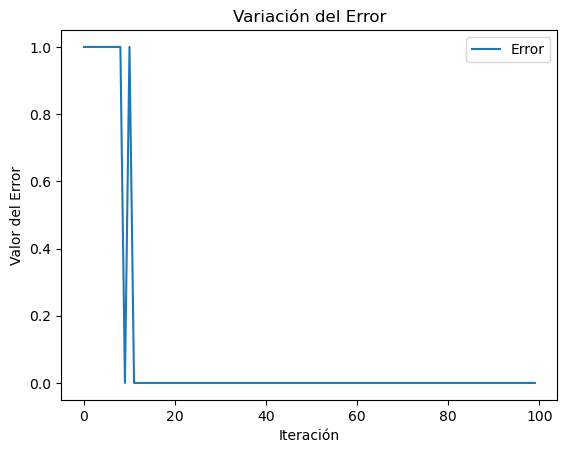

-1.0000000000000009
1.6666666666666683
[1.66666667 1.55555556 1.44444444 1.33333333 1.22222222 1.11111111
 1.         0.88888889 0.77777778 0.66666667]


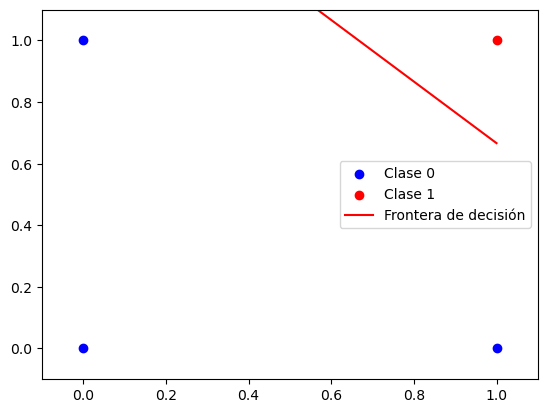

C:\Users\julia\AppData\Local\Temp\ipykernel_21224\2621043166.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [25]:
plot_variacion_error(errorHistorico)
cont += 1
imprimir_regiones(entradas,salidas_esperadas,matriz_pesos,teta, ruta)
animacion(cont, "Evolucion_AND")

<div id='id3'/>

## *Apartado 2*: Resuelve la función XOR. Prueba diferentes learning rates y umbrales para saber cuál es el óptimo. Sacar por pantalla las salidas de la red neuronal y el valor del error para cada iteración.
---

In [31]:
if(os.path.exists("Evolucion_XOR")) == 0:
    os.mkdir("Evolucion_XOR")
ruta = "Evolucion_XOR"

### Inicialización del Perceptrón para la Puerta OR

In [32]:
#Iniciación del Perceptrón
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

salidas_esperadas_OR = np.array([0, 1, 1, 1])

salidas_OR = []
#Vector aleatorio de datos entre 0 y 1
matriz_pesos_OR = np.round(np.random.uniform(low = -1, high = 1, size= (2,)), 2)

teta_OR = float(input("Introduzca el Teta del OR: "))

lr = float(input("Introduzca el Learning Rate: "))

epocas = int(input("Introduzca el numero de repeticiones: "))

cont = 0

### Inicialización del Perceptrón para la Puerta NAND

In [33]:
#Iniciación del Perceptrón

salidas_esperadas_NAND = np.array([1, 1, 1, 0])
teta_NAND = float(input("Introduzca el Teta NAND: "))
salidas_NAND = []
#Vector aleatorio de datos entre 0 y 1
matriz_pesos_NAND = np.round(np.random.uniform(low = -1, high = 1, size= (2,)), 2)

cont = 0

### Inicialización Puerta AND

In [34]:
#Iniciación del Perceptrón
salidas_esperadas_AND = np.array([0, 0, 0, 1])

salidas_AND = []
#Vector aleatorio de datos entre 0 y 1
matriz_pesos_AND = np.round(np.random.uniform(low = -1, high = 1, size= (2,)), 2)

teta_AND = float(input("Introduzca el Teta AND: "))

cont = 0
ruta = "Evolucion_XOR/imagen" + str(cont) + ".png"

### Entrenamiento para Aplicar XOR

---------------
Iteración  0
matriz_pesos [ 0.33 -0.7 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  0
matriz_pesos [ 0.33 -0.7 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
0.3285714285714286
-0.4285714285714286
[-0.42857143 -0.39206349 -0.35555556 -0.31904762 -0.28253968 -0.24603175
 -0.20952381 -0.17301587 -0.13650794 -0.1       ]


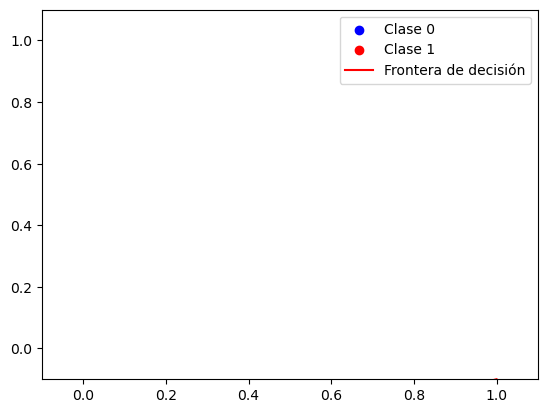

---------------
Iteración  0
matriz_pesos [ 0.23 -0.7 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
0.55
-0.5
[-0.5        -0.43888889 -0.37777778 -0.31666667 -0.25555556 -0.19444444
 -0.13333333 -0.07222222 -0.01111111  0.05      ]


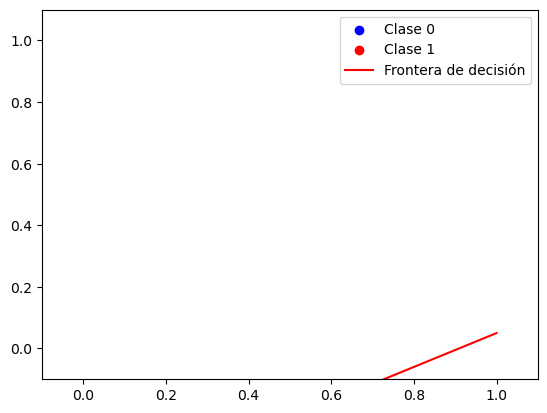

---------------
Iteración  0
matriz_pesos [ 0.33 -0.6 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  0
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.33 -0.6 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  1
matriz_pesos [ 0.33 -0.6 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  1
matriz_pesos [ 0.33 -0.6 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
0.38333333333333336
-0.5
[-0.5        -0.45740741 -0.41481481 -0.37222222 -0.32962963 -0.28703704
 -0.24444444 -0.20185185 -0.15925926 -0.11666667]


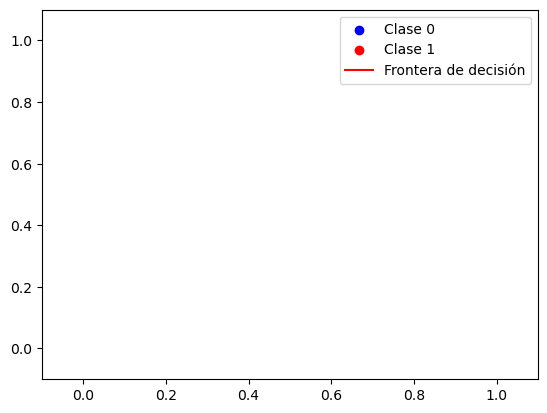

---------------
Iteración  1
matriz_pesos [ 0.23 -0.6 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
0.66
-0.6
[-0.6        -0.52666667 -0.45333333 -0.38       -0.30666667 -0.23333333
 -0.16       -0.08666667 -0.01333333  0.06      ]


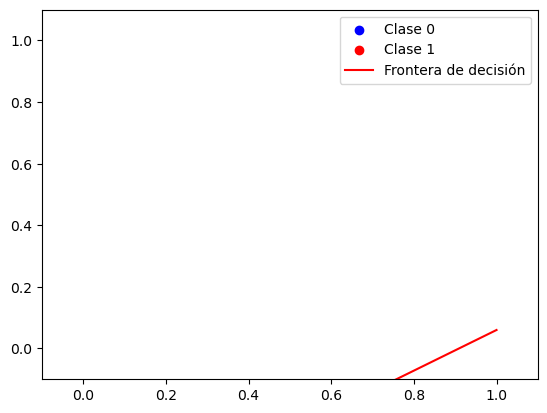

---------------
Iteración  1
matriz_pesos [ 0.33 -0.5 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  1
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.33 -0.5 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  2
matriz_pesos [ 0.33 -0.5 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  2
matriz_pesos [ 0.33 -0.5 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
0.46
-0.6
[-0.6        -0.54888889 -0.49777778 -0.44666667 -0.39555556 -0.34444444
 -0.29333333 -0.24222222 -0.19111111 -0.14      ]


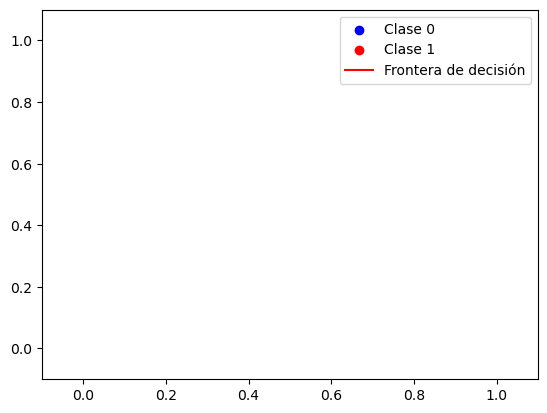

---------------
Iteración  2
matriz_pesos [ 0.23 -0.5 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
0.825
-0.7499999999999999
[-0.75       -0.65833333 -0.56666667 -0.475      -0.38333333 -0.29166667
 -0.2        -0.10833333 -0.01666667  0.075     ]


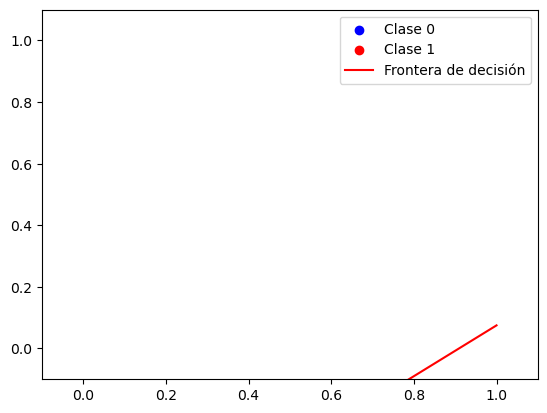

---------------
Iteración  2
matriz_pesos [ 0.33 -0.4 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  2
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.33 -0.4 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  3
matriz_pesos [ 0.33 -0.4 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  3
matriz_pesos [ 0.33 -0.4 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
0.575
-0.7499999999999999
[-0.75       -0.68611111 -0.62222222 -0.55833333 -0.49444444 -0.43055556
 -0.36666667 -0.30277778 -0.23888889 -0.175     ]


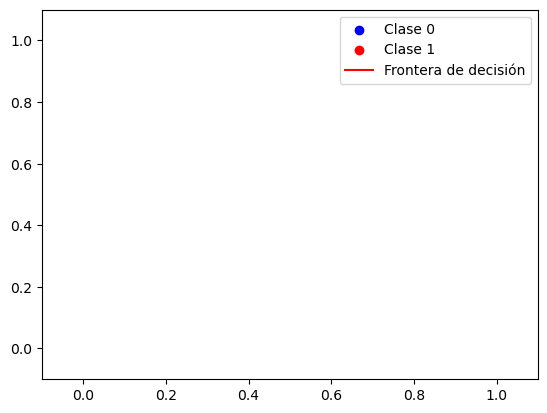

---------------
Iteración  3
matriz_pesos [ 0.23 -0.4 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
1.0999999999999999
-0.9999999999999998
[-1.         -0.87777778 -0.75555556 -0.63333333 -0.51111111 -0.38888889
 -0.26666667 -0.14444444 -0.02222222  0.1       ]


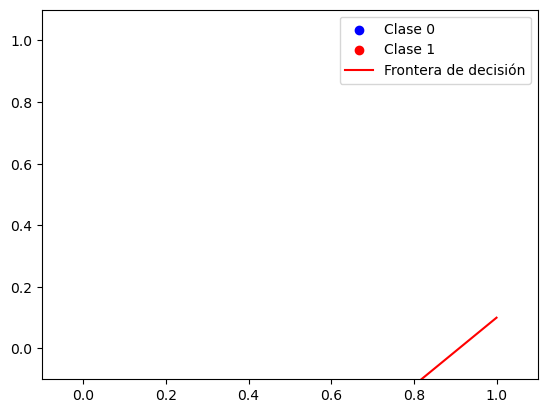

---------------
Iteración  3
matriz_pesos [ 0.33 -0.3 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  3
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.33 -0.3 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  4
matriz_pesos [ 0.33 -0.3 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  4
matriz_pesos [ 0.33 -0.3 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
0.7666666666666666
-0.9999999999999998
[-1.         -0.91481481 -0.82962963 -0.74444444 -0.65925926 -0.57407407
 -0.48888889 -0.4037037  -0.31851852 -0.23333333]


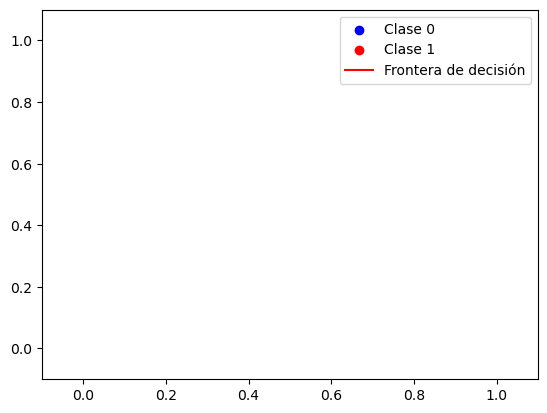

---------------
Iteración  4
matriz_pesos [ 0.23 -0.3 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
1.6499999999999997
-1.4999999999999996
[-1.5        -1.31666667 -1.13333333 -0.95       -0.76666667 -0.58333333
 -0.4        -0.21666667 -0.03333333  0.15      ]


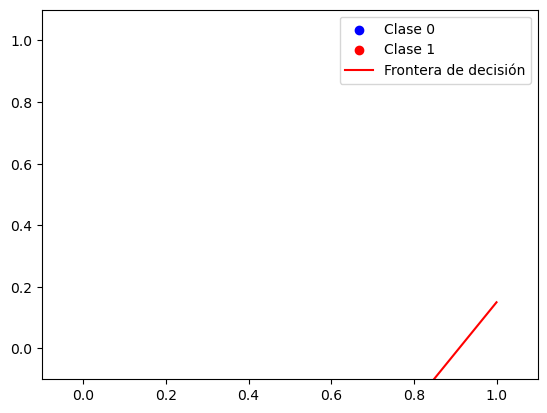

---------------
Iteración  4
matriz_pesos [ 0.33 -0.2 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  4
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.33 -0.2 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  5
matriz_pesos [ 0.33 -0.2 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  5
matriz_pesos [ 0.33 -0.2 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
1.15
-1.4999999999999996
[-1.5        -1.37222222 -1.24444444 -1.11666667 -0.98888889 -0.86111111
 -0.73333333 -0.60555556 -0.47777778 -0.35      ]


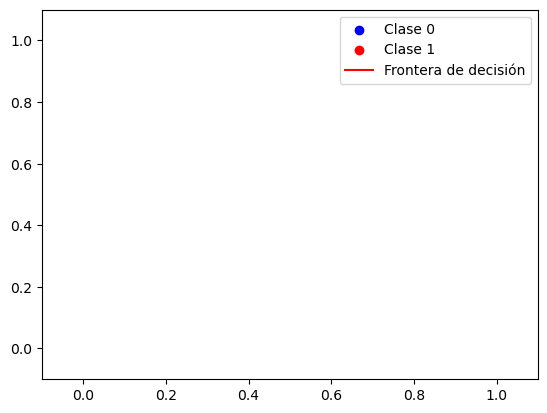

---------------
Iteración  5
matriz_pesos [ 0.23 -0.2 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
3.299999999999999
-2.999999999999999
[-3.         -2.63333333 -2.26666667 -1.9        -1.53333333 -1.16666667
 -0.8        -0.43333333 -0.06666667  0.3       ]


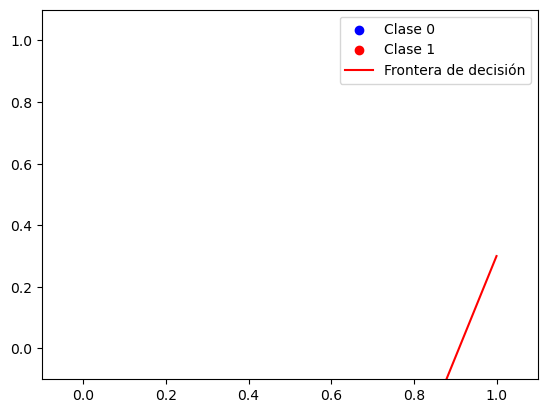

---------------
Iteración  5
matriz_pesos [ 0.33 -0.1 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  5
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 0.33 -0.1 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  6
matriz_pesos [ 0.33 -0.1 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  6
matriz_pesos [ 0.33 -0.1 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
2.2999999999999994
-2.999999999999999
[-3.         -2.74444444 -2.48888889 -2.23333333 -1.97777778 -1.72222222
 -1.46666667 -1.21111111 -0.95555556 -0.7       ]


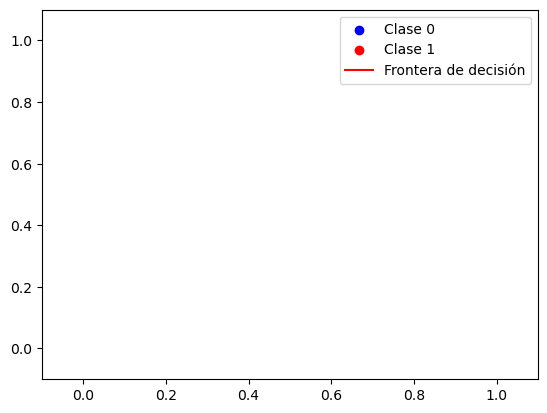

---------------
Iteración  6
matriz_pesos [ 0.23 -0.1 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
1.188950301625811e+16
-1.080863910568919e+16
[-1.08086391e+16 -9.48758321e+15 -8.16652732e+15 -6.84547143e+15
 -5.52441554e+15 -4.20335965e+15 -2.88230376e+15 -1.56124787e+15
 -2.40191980e+14  1.08086391e+15]


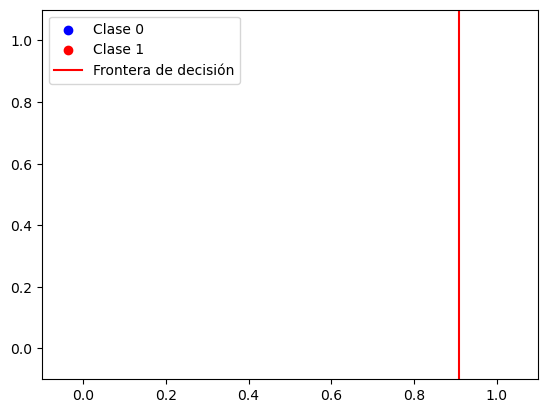

---------------
Iteración  6
matriz_pesos [ 3.30000000e-01 -2.77555756e-17]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  6
Error Total:  [ 0  0 -1  1]
matriz_pesos [ 3.30000000e-01 -2.77555756e-17]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  7
matriz_pesos [ 3.30000000e-01 -2.77555756e-17]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  7
matriz_pesos [ 3.30000000e-01 -2.77555756e-17]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
8286623314361713.0
-1.080863910568919e+16
[-1.08086391e+16 -9.88790318e+15 -8.96716726e+15 -8.04643133e+15
 -7.12569541e+15 -6.20495949e+15 -5.28422356e+15 -4.36348764e+15
 -3.44275172e+15 -2.522

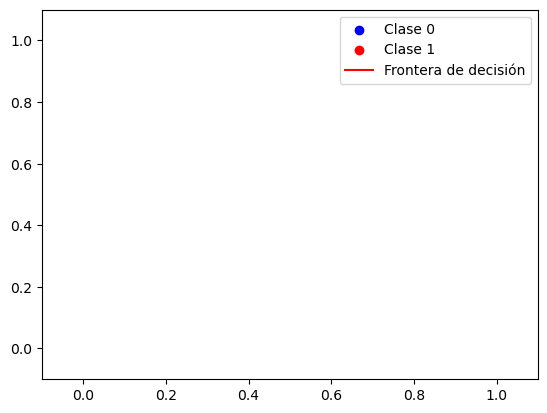

---------------
Iteración  7
matriz_pesos [ 2.30000000e-01 -2.77555756e-17]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
-3.3000000000000007
3.0000000000000004
[ 3.          2.63333333  2.26666667  1.9         1.53333333  1.16666667
  0.8         0.43333333  0.06666667 -0.3       ]


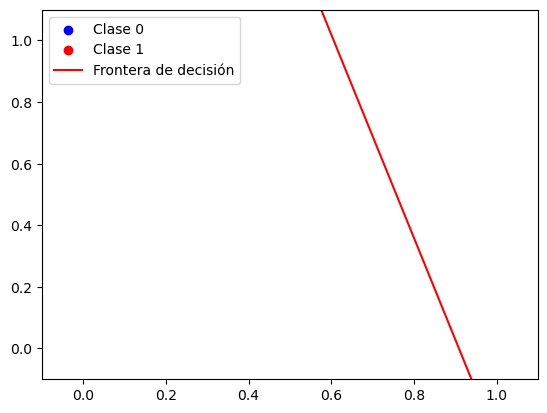

---------------
Iteración  7
matriz_pesos [0.33 0.1 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
---------------
---------------
Iteración  7
Error Total:  [ 0  0 -1  1]
matriz_pesos [0.33 0.1 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 0]
Error 1
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  1]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  8
matriz_pesos [0.33 0.1 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  8
matriz_pesos [0.33 0.1 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
-2.3000000000000007
3.0000000000000004
[3.         2.74444444 2.48888889 2.23333333 1.97777778 1.72222222
 1.46666667 1.21111111 0.95555556 0.7       ]


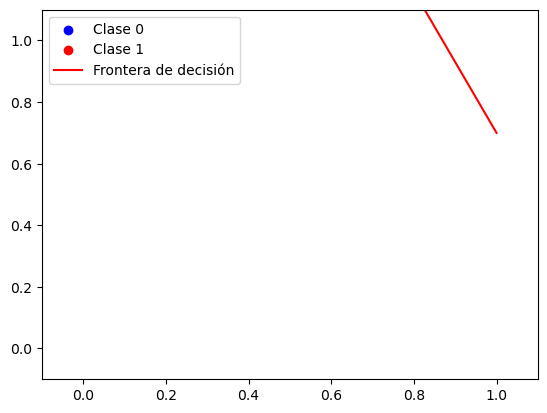

---------------
Iteración  8
matriz_pesos [0.23 0.1 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1]
Error -1
---------------
---------------
Iteración  8
matriz_pesos [0.23 0.1 ]
Entradas:  [1 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 1]
Error 0
---------------
---------------
Iteración  8
Error Total:  [ 0  0 -1  0]
matriz_pesos [0.23 0.1 ]
Entradas:  [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 1, 1]
Error 0
Entradas 0.11999999999999994
Error total:  [ 0  0 -1  0]
Learning Rate:  0.1
Theta:  0.1
Theta AND:  0.3
---------------
---------------
Iteración  9
matriz_pesos [0.23 0.1 ]
Entradas:  [0 0]
Salidas esperadas [0 0 0 1]
salidas [0]
Error 0
---------------
---------------
Iteración  9
matriz_pesos [0.23 0.1 ]
Entradas:  [0 1]
Salidas esperadas [0 0 0 1]
salidas [0, 0]
Error 0
---------------
---------------
Iteración  9
matriz_pesos [0.23 0.1 ]
Entradas:  [1 0]
Salidas esperadas [0 0 0 1]
salidas [0, 0, 0]
Error 0
---------------


C:\Users\julia\AppData\Local\Temp\ipykernel_21224\2621043166.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [35]:
entradas = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
errorHistorico = []
periodo = 0
for periodo in range(epocas):
    salidas_OR = []
    salidas_NAND = []
    salidas_AND = []
    for i in range(4):
        #Entrenamiento OR
        S_OR = matriz_pesos_OR[0] * entradas[i][0] + matriz_pesos_OR[1] * entradas[i][1]
        salida_real_OR = limite(S_OR, teta_OR)
        salidas_OR.append(salida_real_OR)
        error_OR = salidas_esperadas_OR[i] - salidas_OR[i]
        if error_OR != 0:
            matriz_pesos_OR = matriz_pesos_OR + (lr * error_OR * entradas[i])

        #Entrenamiento NAND
        S_NAND = matriz_pesos_NAND[0] * entradas[i][0] + matriz_pesos_NAND[1] * entradas[i][1]
        salida_real_NAND = limite(S_NAND, teta_NAND)
        salidas_NAND.append(salida_real_NAND)
        error_NAND = salidas_esperadas_NAND[i] - salidas_NAND[i]
        if error_NAND != 0:
            matriz_pesos_NAND = matriz_pesos_NAND + (lr * error_NAND * entradas[i])
            
        #Entrenamiento AND
        entradas_AND = [salida_real_OR, salida_real_NAND]
        
        S_AND = matriz_pesos_AND[0] * entradas[i][0] + matriz_pesos_AND[1] * entradas[i][1]
        salida_real_AND = limite(S_AND, teta_AND)
        salidas_AND.append(salida_real_AND)
        errorAND = salidas_esperadas_AND[i] - salidas_AND[i]
        resultados.append([
            periodo,  # Número de época
            lr,  # Learning rate
            teta_AND,  # Valor de umbral (theta)
            matriz_pesos_AND[0],  # Pesos de las entradas (w1)
            matriz_pesos_AND[1],  # Pesos de las entradas (w2)
            entradas_AND[0],  # Entrada 1
            entradas_AND[1],  # Entrada 2
            salidas_esperadas_AND[i],  # Salida esperada
            salida_real_AND,  # Salida obtenida
            error_NAND  # Error
        ])
        if errorAND != 0:
            matriz_pesos_AND = matriz_pesos_AND + (lr * errorAND * entradas[i])
        print("---------------")
        print("Iteración ",periodo)
        print("matriz_pesos", matriz_pesos_AND)
        print("Entradas: ", entradas[i])
        print("Salidas esperadas", salidas_esperadas_AND)
        print("salidas", salidas_AND)
        print("Error", errorAND)
        print("---------------")

    errorHistorico.append(abs(errorAND).sum())
    errorTotal = salidas_esperadas_AND - salidas_AND
    
    print("---------------")
    print("Iteración ",periodo)
    print("Error Total: ", errorTotal)
    print("matriz_pesos", matriz_pesos_AND)
    print("Entradas: ", entradas)
    print("Salidas esperadas", salidas_esperadas_AND)
    print("salidas", salidas_AND), 
    print("Error", errorAND)
    print("Entradas", S)
    print("Error total: ", errorTotal)
    print("Learning Rate: ", lr)
    print("Theta: ", teta)
    print("Theta AND: ", teta_AND)
    print("---------------")

        
encontrado = 0
for k in range(4):
    if errorTotal[k] == 0:
        encontrado += 1

if encontrado == 4:
    print("--------------------------")
    print("EPOCA: ", epocas)
    print("Entrenamiento terminado con  "+ str(epocas) + " epocas")
    print("--------------------------")
    print("matriz_pesos", matriz_pesos_AND)
    print("Entradas: ", entradas_AND)
    print("Salidas esperadas", salidas_esperadas_AND)
    print("salidas", salidas_AND), 
    print("Error", errorAND)
    print("Entradas", S_AND)
    print("Error total: ", errorTotal)
    print("Learning Rate: ", lr)
    print("Theta: ", teta_AND)
else:
    print("No he aprendido con: ", epocas)
    print("Learning Rate: ", lr)
    print("Theta: ", teta_AND)

escribir_csv("L2P1-Perceptron_XOR.csv", resultados)
animacion(cont, "Evolucion_XOR")


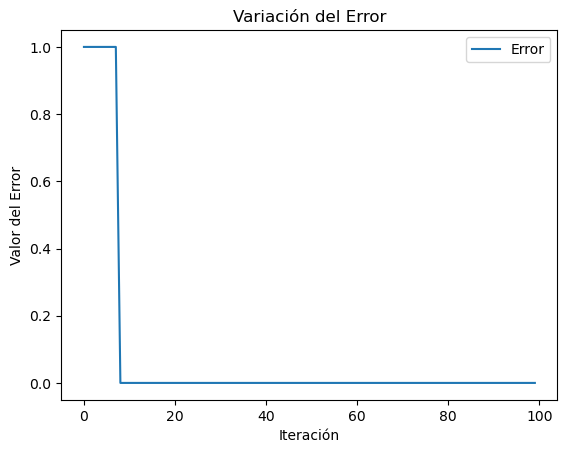

-2.3000000000000007
3.0000000000000004
[3.         2.74444444 2.48888889 2.23333333 1.97777778 1.72222222
 1.46666667 1.21111111 0.95555556 0.7       ]


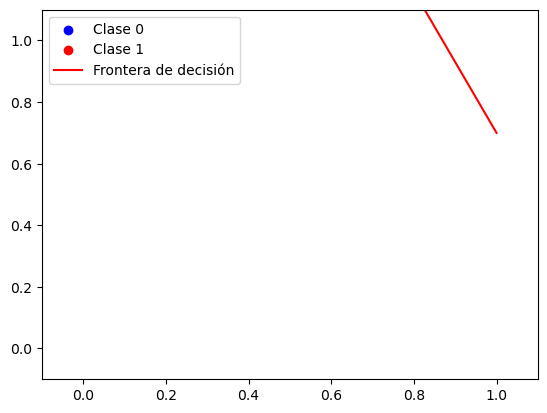

C:\Users\julia\AppData\Local\Temp\ipykernel_21224\2621043166.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [40]:
plot_variacion_error(errorHistorico)